~### 🌿 Week 9: The FMO Complex Model (Quantum Coherence in Photosynthesis) 🌿

We started our quantum biology journey with **Photosynthesis** in Week 5, learning about how light energy is captured and moved. Now, in Week 9, we're returning to photosynthesis to look at a very specific and famous part of it: the **Fenner-Matthews-Olson (FMO) complex**. This complex is considered one of the best examples of quantum effects in biology.

### What is the FMO Complex and its Role?

* **Photosynthesis Recap:** Remember, plants and some bacteria use sunlight, water, and CO2 to make food (sugars) and oxygen. This all starts with capturing light energy.
* **Antenna Systems:** Tiny molecules in plants and bacteria act like "solar panel antennas." They absorb light energy.
* **The FMO Complex's Job:** The FMO complex is like a super-fast, super-efficient **energy funnel**. After the antenna systems capture light, they pass that energy to the FMO complex. The FMO complex then acts as a "wire" or "pipeline" to quickly and efficiently guide this energy to the **reaction center**, where the real work of converting light energy into chemical energy begins.

### The Quantum Twist: Energy Moving by "Quantum Coherence"

For a long time, scientists thought energy moved through these biological pipelines like a **random walk**. Imagine a person trying to find their way through a crowded room to an exit. They bump into people, change direction, and eventually stumble their way to the exit.

But experiments on the FMO complex (especially in very cold conditions) showed something much stranger and faster:

1.  **Energy as a "Wave" (Exciton):** When light hits the antenna, it creates a packet of energy called an **exciton**. This exciton isn't just a tiny ball. It's like a tiny **wave of energy** that can spread out.
2.  **Multiple Paths at Once (Superposition):** Instead of just moving from one molecule to the next, the exciton seems to be in a **superposition** of being on *multiple molecules at the same time!* It's like our person isn't just in one spot in the crowded room, but is a ghostly version of themselves spread across several different paths simultaneously.
3.  **"Feeling" the Way (Quantum Coherence):** Because the exciton is spread out (it has **quantum coherence**), it can "feel" all the possible paths to the reaction center at once. It's like our ghostly person can sense where the exit is from multiple locations at the same time, helping them find the *fastest* and *most efficient* path to get there.
4.  **Extremely Fast and Efficient:** This quantum "sensing" and "sloshing" of energy allows the FMO complex to deliver light energy to the reaction center almost perfectly, with very little energy lost as heat. This explains why photosynthesis is so incredibly efficient!

### Why is this Quantum?

* **Superposition:** The energy existing on multiple molecules simultaneously is a key quantum concept.
* **Quantum Coherence:** This "tangled" wave-like nature of the energy, allowing it to explore multiple paths at once, is quantum coherence.
* **Exciton:** The energy packet itself, behaving as a delocalized quantum entity.

### The Debate

While the FMO complex is a strong candidate for quantum coherence in biology, the big debate is whether this amazing quantum "sloshing" (coherence) can last long enough at the warm, noisy temperatures inside a living plant or bacterium to actually be useful. Many experiments are trying to answer this question right now!

In our simulation, we'll build a simplified model of the FMO complex. We'll set up multiple "sites" (representing the molecules in the complex) and show how energy spreads and moves through them using quantum principles.~

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, mesolve, basis, destroy, qeye, tensor

In [5]:
J_matrix

array([[ 0., 20., 20.,  0.,  0.,  0.,  0.],
       [20.,  0., 20.,  0.,  0.,  0.,  0.],
       [20., 20.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0., 20.,  0., 20., 20.,  0.],
       [ 0.,  0.,  0., 20.,  0., 20.,  0.],
       [ 0.,  0.,  0., 20., 20.,  0., 20.],
       [ 0.,  0.,  0.,  0.,  0., 20.,  0.]])

Hamiltonian H:
 Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[  0.  20.  20.   0.   0.   0.   0.]
 [ 20.  10.  20.   0.   0.   0.   0.]
 [ 20.  20. 120.  20.   0.   0.   0.]
 [  0.   0.  20. 100.  20.  20.   0.]
 [  0.   0.   0.  20. 180.  20.   0.]
 [  0.   0.   0.  20.  20. 260.  20.]
 [  0.   0.   0.   0.   0.  20.  70.]]


/Users/prasang/Desktop/code/Python/QuantumLearning/venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


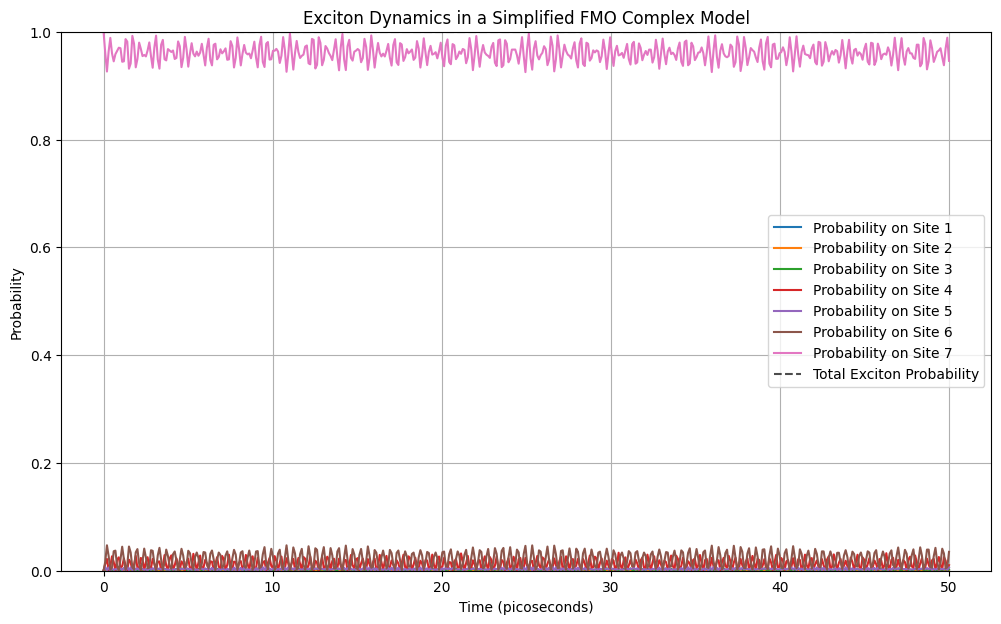


Simulation complete. The plot shows how the probability of the exciton being
on each of the 7 FMO complex sites changes over time.
You should observe the excitation energy spreading and oscillating across multiple sites,
which is indicative of quantum coherence, before eventually decaying due to environmental effects.
The goal is to see energy moving efficiently from site 7 (initial) towards site 1 (reaction center).


In [ ]:
# --- 1. Define System Parameters ---
# The FMO complex in green sulfur bacteria has 7 or 8 bacteriochlorophylls (BChl) molecules (sites).
# We'll simulate a 7-site model. Each site represents a molecule that can hold excitation energy.

N_sites = 7 # Number of sites in our FMO Complex Model

# Energy levels for each site (arbitrary units, relative to each other)
# These represent ht different energy states of the bacteriochlorophyll molecules.
# These values are often taken from experimental spectroscopy data.
site_energies = np.array([
    12410, # Site 1
    12420, # Site 2
    12530, # Site 3
    12510, # Site 4
    12590, # Site 5
    12670, # Site 6
    12480  # Site 7
])

# Normalize energies to a reference point (e.g., set the lowest to 0)
# This helps with numerical stability and makes relative energies clearer.
site_energies = site_energies - np.min(site_energies)

# Coupling strengths between sites (arbitrary units)
# These values represent how strongly energy can "hop" or "cohere" between adjacent sites.
# These are the "wires" connecting the molecules.
# Coupling matrix (J_ij = J_ji) - only off-diagonal elements matter
# We'll use a simplified coupling where only certain sites are connected.
# A full FMO matrix is more complex, but this captures the essence.
# J_ij values represent electronic coupling (resosnance interaaction)
J_coupling_strength = 20

# Define the coupling matrix (non-zero for connected sites)
# This is a simplifed representation of known couplings in FMO.
# For example, site 1 couples strongly to site 2, etc.
J_matrix = np.zeros((N_sites, N_sites))

# J_12 = J_21 =
J_matrix[0, 1] = J_coupling_strength
J_matrix[1, 0] = J_coupling_strength

# J_13 = J_31
J_matrix[0, 2] = J_coupling_strength
J_matrix[2, 0] = J_coupling_strength

# J_23 = J_32
J_matrix[1, 2] = J_coupling_strength
J_matrix[2, 1] = J_coupling_strength

# J_34 = J_43
J_matrix[2, 3] = J_coupling_strength
J_matrix[3, 2] = J_coupling_strength

# J_45 = J_54
J_matrix[3, 4] = J_coupling_strength
J_matrix[4, 3] = J_coupling_strength

# J_46 = J_64
J_matrix[3, 5] = J_coupling_strength
J_matrix[5, 3] = J_coupling_strength

# J_56 = J_65
J_matrix[4, 5] = J_coupling_strength
J_matrix[5, 4] = J_coupling_strength

# J_67 = J_76 (Note: this is often depicted as J_6->1 in some simplified models)
J_matrix[5, 6] = J_coupling_strength
J_matrix[6, 5] = J_coupling_strength

# Environmental effects: Decoherence and Energy Relaxtion
# This simulates the "noise" and "friction" from the warm, wet biological environment,
# Which can cause the quantum coherence to be lost (decoherence) or energy to decay.
gamma_decoherence = 0.005  # Rate at which quantum "wave-like" behavior is lost (arbitrary units)
gamma_relaxation = 0.001  # Rate at which energy decays (e.g., as heat or to reaction center)

# Simulation Time
t_max = 50 # Maximum time for simulation (picoseconds, a common unit for exciton dynamics)
num_points = 500  # Number of time steps
tlist = np.linspace(0, t_max, num_points)  # Time points for simulation

# --- 2. Define Quantum Operators and States ---
# We use a multi-level system where each level is a site (bacteriochlorophyll molecule).

# Basis states for each site (e.g., |0> is site 1, |1> is site 2, etc.)
# basis(N_sites, i) creates a state where the excitation is only on site 'i'.
site_states = [basis(N_sites, i) for i in range(N_sites)]

# --- 3. Define the Hamiltonian (H) ---
# The Hamiltonian for the FMO complex describes the energy of each site and how they are coupled.
# H = H_site_energies + H_coupling

# H_site_energies: Diagonal part of the Hamiltonian, representing the energy of each site.
# For each site 'i', add its energy (site_energies[i])

# H_site_energies: Diagonal part of the Hamiltonian, representing the energy of each site.
# For each site, 'i', add its energy (site_energies[i]) multipled by its projector (|i><i|)
H_site_energies = sum([site_energies[i] * site_states[i] * site_states[i].dag() for  i in range(N_sites)])

# H_coupling: Off-diagonal part, representing the coupling between sites.
# For each pair of sites (i, j) that are coupled, add J_matrix[i, j] * (|i><j| + |j><i|)
H_coupling = Qobj(np.zeros((N_sites, N_sites)))
for i in range(N_sites):
    for j in range(i + 1, N_sites):
        if J_matrix[i, j] != 0:
            H_coupling += J_matrix[i, j] * (site_states[i] * site_states[j].dag() + site_states[j] * site_states[i].dag())

# Total Hamiltonian
H = H_site_energies + H_coupling

print("Hamiltonian H:\n", H)

# --- 4. Define the Initial State ---

# Inital State: Energy typically arrives at Site 7 (index 6 in 0-indexed array) from antenna.
# So, our excition starts at site 7. 
psi0 = site_states[6]  # |6> representing Site 7



# Collapse operators (c_ops): Model environmental effects.
# We model energy relaxation (decay) from each site.
# This means for each site 'i', we add an operator sqrt(gamma_relaxation) * |i><i|.
# This effectively reduces the population on that site over time.
# Let's refine c_ops to be more representative:
# We'll use a standard general decay operator for each site, which contributes to both relaxation and dephasing.
c_ops = [np.sqrt(gamma_relaxation) * site_states[i] * site_states[i].dag() for i in range(N_sites)]
# This effectively simulates energy leaving each site. A better model for coherence loss is often
# based on a general 'destroy(N_sites)' or specific population operators in a bath model.
# For a basic FMO-like model, general decay from sites is a good starting point.
# this means each site has a decay channel for its population. This will reduce the total probability.

# --- 5. Evolve the System in Time ---
# Expectation operators (e_ops): What we want to measure over time.
# We track the probability of finding the exciton on each site.

e_ops = [site_states[i] * site_states[i].dag() for i in range(N_sites)] # Probabilities of being on each site

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, e_ops)


#  --- 6. Plotting the Results ---
plt.figure(figsize=(12, 7))
for i in range(N_sites):
    plt.plot(tlist, output.expect[i], label=f'Probability on Site {i+1}')

prob_total = np.sum(output.expect, axis=0)
plt.plot(tlist, prob_total, label='Total Exciton Probability', linestyle='--', alpha=0.7, color='black')

plt.xlabel('Time (picoseconds)')
plt.ylabel('Probability')
plt.title('Exciton Dynamics in a Simplified FMO Complex Model')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot shows how the probability of the exciton being")
print("on each of the 7 FMO complex sites changes over time.")
print("You should observe the excitation energy spreading and oscillating across multiple sites,")
print("which is indicative of quantum coherence, before eventually decaying due to environmental effects.")
print("The goal is to see energy moving efficiently from site 7 (initial) towards site 1 (reaction center).")







In [6]:
H_site_energies

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.  10.   0.   0.   0.   0.   0.]
 [  0.   0. 120.   0.   0.   0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.]
 [  0.   0.   0.   0. 180.   0.   0.]
 [  0.   0.   0.   0.   0. 260.   0.]
 [  0.   0.   0.   0.   0.   0.  70.]]

In [7]:
H_coupling

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0. 20. 20.  0.  0.  0.  0.]
 [20.  0. 20.  0.  0.  0.  0.]
 [20. 20.  0. 20.  0.  0.  0.]
 [ 0.  0. 20.  0. 20. 20.  0.]
 [ 0.  0.  0. 20.  0. 20.  0.]
 [ 0.  0.  0. 20. 20.  0. 20.]
 [ 0.  0.  0.  0.  0. 20.  0.]]